In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train = np.loadtxt('train_X.csv', delimiter = ',').T
Y_train = np.loadtxt('train_label.csv', delimiter = ',').T

X_test = np.loadtxt('test_X.csv', delimiter = ',').T
Y_test = np.loadtxt('test_label.csv', delimiter = ',').T

In [3]:
print("Shape of X_train:",X_train.shape)
print("Shape of Y_train:",Y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of Y_test:",Y_test.shape)

Shape of X_train: (784, 1000)
Shape of Y_train: (10, 1000)
Shape of X_test: (784, 350)
Shape of Y_test: (10, 350)


## Displaying images from the train data

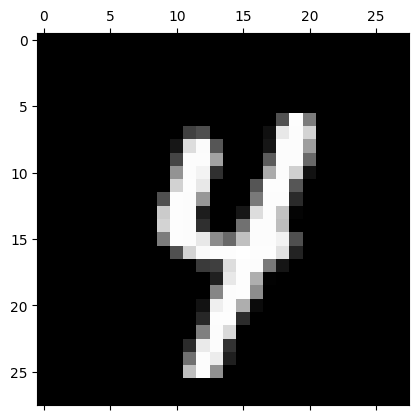

In [4]:
import random
index = random.randrange(0, X_train.shape[1])
plt.matshow(X_train[:,index].reshape(28,28), cmap = 'gray')
plt.show()

## Model:

![nn](nn.png)

 - For our hidden layer, we'll be using either ReLU or Tanh activation function.
- Softmax will be used for the output layer.


## Initialize parameters randomly
$ W_1 = np.random.randn(n_1, n_0) $

$ b_1 = np.zeros((n_1, 1))$

$ W_2 = np.random.randn(n_2, n_1) $

$ b_2 = np.zeros((n_2, 1))$


## *Repeat below steps several times :*


## Forward Propagation 

$ Z_1 = W_1 * X + B_1 $

$ A_1 = f ( Z_1 ) $  

$ Z_2 = W2 * A_1 + B_2 $

$ A_2 = Softmax( Z_2 ) $

## Softmax 

$ a_i = \frac{e^{z_i}}{\sum_{i=k}^ne^{z_k}}$


## Cost Function 

$Loss = - \sum_{i=k}^{n}[ y_k*log(a_k) ]$

$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$



## Backward Propagation
$dZ_2 = ( A_2 - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$



$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.X^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$


## Updating Parameters

$ W_2 = W_2 -  \alpha * \frac{\partial Cost }{\partial W_2}$ 

$ B_2 = B_2 -  \alpha * \frac{\partial Cost }{\partial B_2}$ 

$ W_1 = W_1 -  \alpha * \frac{\partial Cost }{\partial W_1}$ 

$ B_1 = B_1 -  \alpha * \frac{\partial Cost }{\partial B_1}$ 


## Defining activation functions for the model

In [5]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x,0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

## Defining derivatives for the activation functions 

In [6]:
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

## Initializing Parameters
- Note the following:
  - n_x is the number of neurons in the input layer
  - n_h is the number of neurons in the hidden layer
  - n_y is the number of neurons in the output layer

- The weights and biases are initialized randomly and we try to reduce them here by multplication, with a samller decimal

In [7]:
def initialize_parameters(n_x,n_h,n_y):
    w1 = np.random.randn(n_h,n_x)*0.0001
    b1 = np.zeros((n_h,1))

    w2 = np.random.randn(n_y,n_h)*0.0001
    b2 = np.zeros((n_y,1))

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2,
    }

    return parameters

## Forward Propagation

$ Z_1 = W_1 * X + B_1 $

$ A_1 = f ( Z_1 ) $  

$ Z_2 = W2 * A_1 + B_2 $

$ A_2 = Softmax( Z_2 ) $

In [8]:
def forward_propagation(x, parameters):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    z1 = np.dot(w1,x) + b1
    a1 = tanh(z1)

    z2 = np.dot(w2,a1) + b2
    a2 = softmax(z2)

    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2,
    }

    return forward_cache

## Cost Function
- For multiclassification

$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$

In [9]:
def cost_function(a2,y):
    m = y.shape[1]
    cost = -(1/m)*np.sum(y*np.log(a2))
    return cost

## Backpropagation

$dZ_2 = ( A_2 - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$



$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.X^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$

In [10]:
def back_propagation(x,y, parameters, forward_cache):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    a1 = forward_cache['a1']
    a2 = forward_cache['a2']

    m = x.shape[1]
    
    dz2 = a2 - y
    dw2 = (1/m)*np.dot(dz2,a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)

    dz1 = (1/m)*np.dot(w2.T,dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1,x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)

    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }

    return gradients

## Update Parameters

In [11]:
def update_parameters(parameters, gradients, learning_rate):
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']

    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }

    return parameters

## Complete Model Implementation

In [12]:
def model(x, y, n_h, learning_rate, epochs):
    n_x = x.shape[0]
    n_y = y.shape[0]
    cost_list = []

    parameters = initialize_parameters(n_x, n_h, n_y)

    for e in range(epochs):

        forward_cache = forward_propagation(x, parameters)

        cost = cost_function(forward_cache['a2'], y)

        gradients = back_propagation(x,y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)

        if(e%(epochs/10) == 0):
            print("Cost after", e, "epochs is:", cost)

    return parameters, cost_list

In [13]:
epochs = 700
n_h = 1000
learning_rate = 0.02
Parameters, Cost_list = model(X_train, Y_train, n_h, learning_rate, epochs)

Cost after 0 epochs is: 2.3025200078790666
Cost after 70 epochs is: 0.649039721955442
Cost after 140 epochs is: 0.358354373154697
Cost after 210 epochs is: 0.24863384931805377
Cost after 280 epochs is: 0.18342397181543774
Cost after 350 epochs is: 0.13938409933174292
Cost after 420 epochs is: 0.10785522962655782
Cost after 490 epochs is: 0.08464941874569135
Cost after 560 epochs is: 0.06762311089257991
Cost after 630 epochs is: 0.05514564634310087


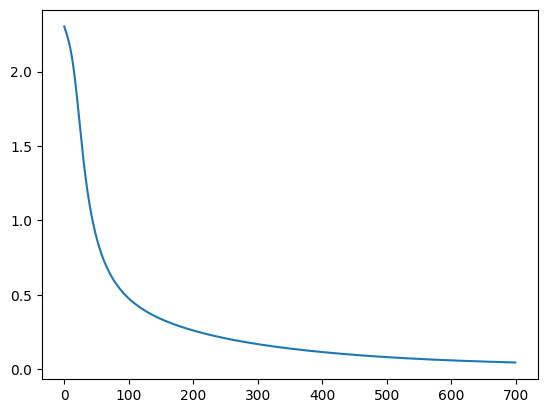

In [14]:
t = np.arange(0, epochs)
plt.plot(t, Cost_list)
plt.show()

In [15]:
def accuracy(inp, labels, parameters):
    
    forward_cache = forward_propagation(inp, parameters)

    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)
    
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

In [16]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

Accuracy of Train Dataset 99.9 %
Accuracy of Test Dataset 84.86 %


## Trying out multiple predictions on handwritten digits

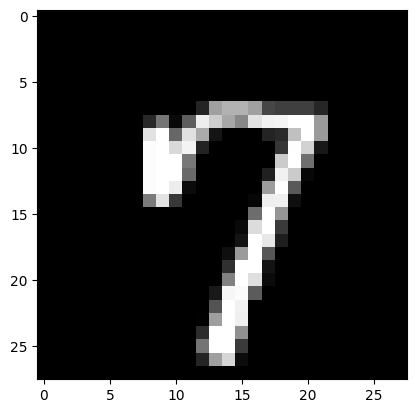

Our model says it is : 7


In [17]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)), cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])

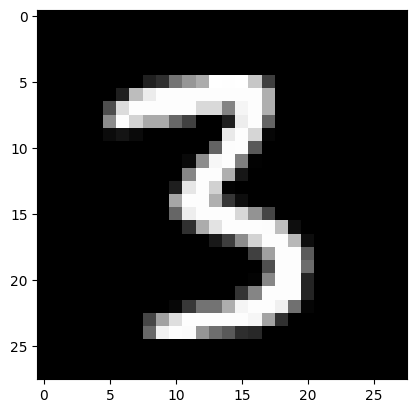

Our model says it is : 3


In [18]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)), cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])

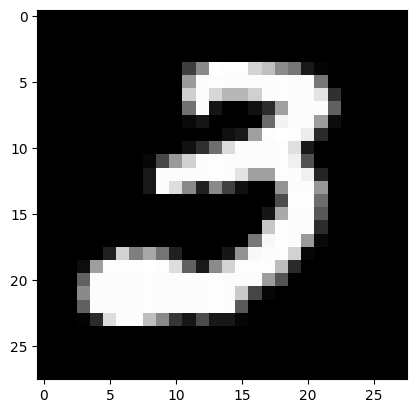

Our model says it is : 3


In [19]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)), cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])

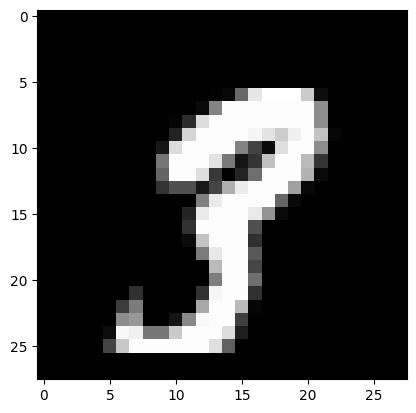

Our model says it is : 3


In [20]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)), cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])

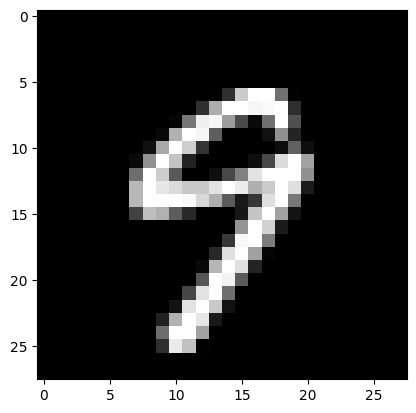

Our model says it is : 9


In [21]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)), cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])

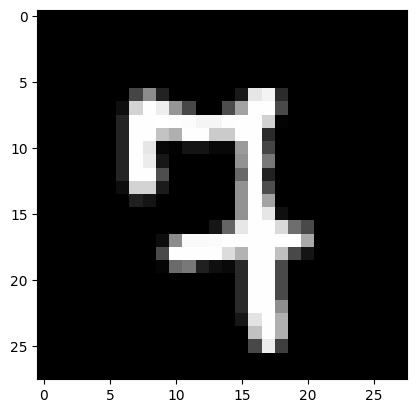

Our model says it is : 9


In [22]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)), cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])

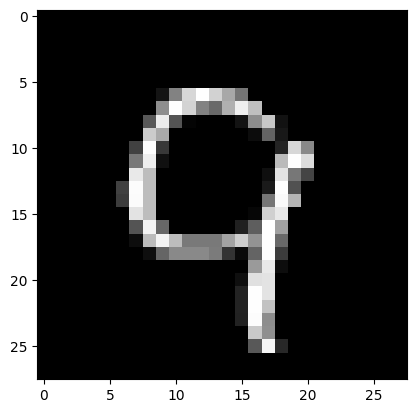

Our model says it is : 9


In [23]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)), cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])

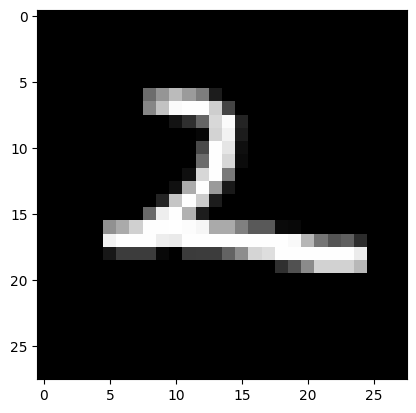

Our model says it is : 6


In [24]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)), cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])

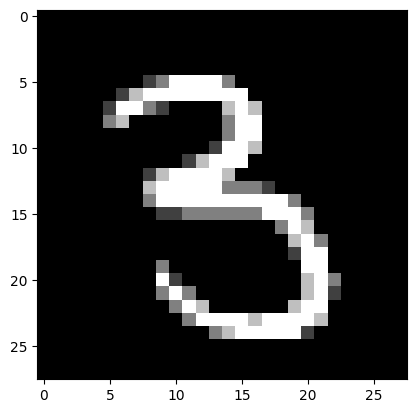

Our model says it is : 3


In [25]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)), cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])

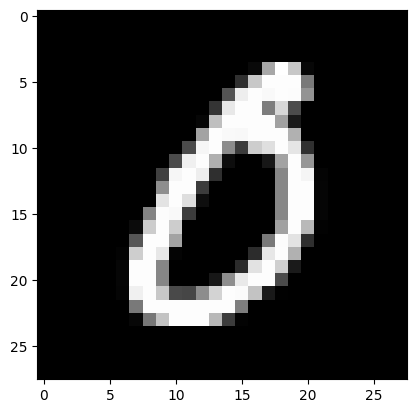

Our model says it is : 0


In [26]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)), cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])

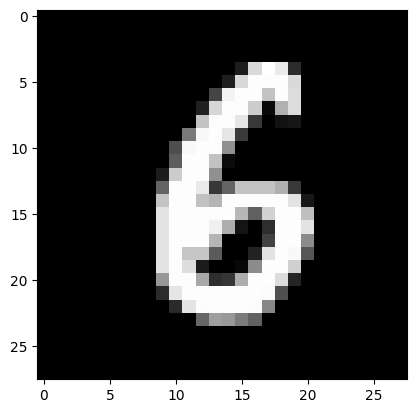

Our model says it is : 6


In [27]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)), cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])